
<h1>Задание 1</h1>

есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   
Необходимо прочитать его и представить в виде df 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from collections import Counter

In [2]:
df = pd.read_csv('shopping_trends_updated.csv')
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

<h1>Задание 2.1</h1>

На основании данных из задания 1 необходимо составить максимальное(миним 5) кол-во гипотез о корреляциях между отдельными столбцами и проверить их (аналогично воршопу). При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

1. **Проверяем гипотезу, что средняя покупка по некоторым категорям товаров значительно выше, чем по другим.**

Получается, что у всех категорий примерно одинаковая средняя стоимость покупки

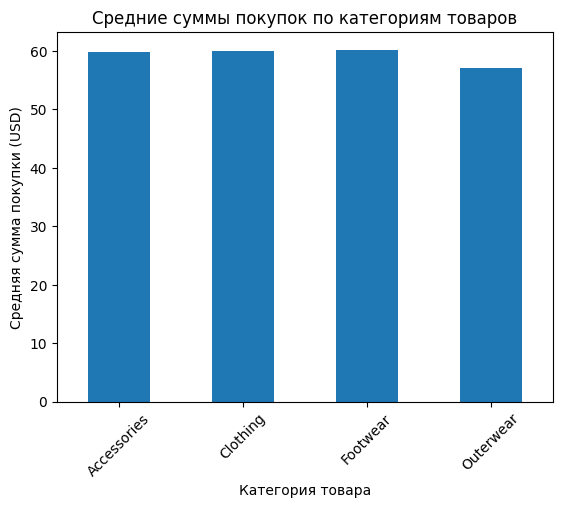

In [64]:
average_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean()

average_purchase_by_category.plot(kind='bar', rot=45)
plt.title('Средние суммы покупок по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Средняя сумма покупки (USD)')
plt.show()

2. **Проверяем гипотезу, что положительные отзывы (рейтинг 5) оставляют больше женщин, чем мужчин**

Гипотеза подтвердилась - на ~0,4% больше женщин ставят рейтинг 5.0 чем мужчины

In [65]:
positiv_rating = df['Review Rating'] == 5.

pivot_table = pd.pivot_table(df[positiv_rating], index='Gender', values='Review Rating', aggfunc='count')
pivot_table.rename(columns={'Review Rating' : '5.0 Rating'}, inplace=True)

pivot_table['Total'] = df['Gender'].value_counts()
pivot_table['Percentage Gender'] = (pivot_table['5.0 Rating'] / pivot_table['Total']) * 100

pivot_table

,5.0 Rating,Total,Percentage Gender
Gender,,,
Female,25,1248,2.003205
Male,43,2652,1.621418


3. **Клиенты, кто используют промокоды, чаще покупают**

Гипотеза не подтвердилась - почти всегда больше людей покупают без промокодов

In [66]:
frequency = df['Frequency of Purchases'].unique()

freq_promo_code = []
for freq in frequency:
    df_temp = df[df['Frequency of Purchases'] == freq]
    freq_promo_code.append((df_temp[df_temp['Promo Code Used'] == 'Yes'].shape[0], df_temp[df_temp['Promo Code Used'] == 'No'].shape[0]))

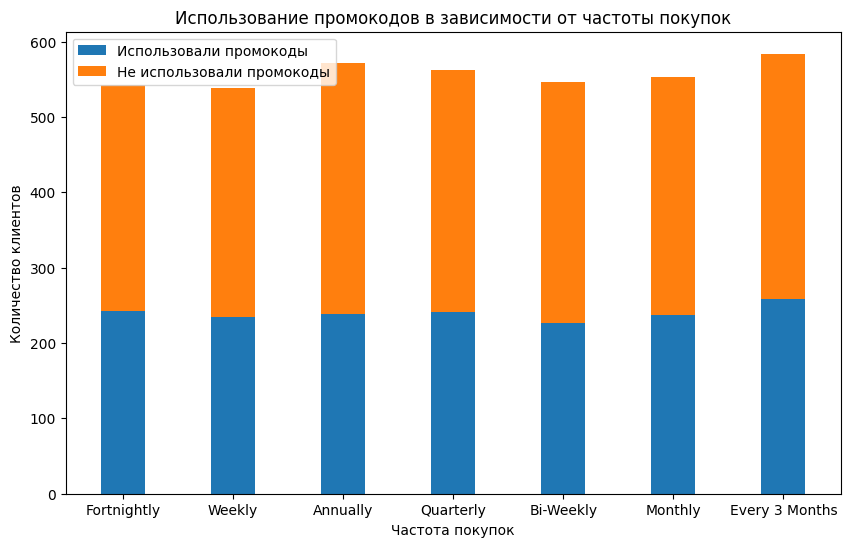

In [67]:
used_promo_codes = [item[0] for item in freq_promo_code]
unused_promo_codes = [item[1] for item in freq_promo_code]

plt.figure(figsize=(10, 6))
plt.bar(frequency, used_promo_codes, width=0.4, label='Использовали промокоды')
plt.bar(frequency, unused_promo_codes, width=0.4, label='Не использовали промокоды', bottom=used_promo_codes)

plt.xlabel('Частота покупок')
plt.ylabel('Количество клиентов')
plt.title('Использование промокодов в зависимости от частоты покупок')
plt.xticks(frequency)
plt.legend()
plt.show()

4. **Зависит ли значение рейтинга от сезона покупки?**

Получаем, что в среднем более высокие рейтинги покупатели ставят весной, а самые низкие осенью

In [68]:
pivot_table = pd.pivot_table(df, index='Season', values='Review Rating', aggfunc='mean')
pivot_table

,Review Rating
Season,
Fall,3.729949
Spring,3.790591
Summer,3.725654
Winter,3.752111


5. **Проверим гипотезу, есть ли зависимость между возрастом покупателя и количеством прошлых покупок**

Получаем, что возраст влияет на количество прошлых покупок. Больше всего (27%) покупок (от 25-20) совершили люди с возрастом между 25 и 50. Люди с возрастом больше 50 совершили имеют больше 20% покупок с количеством между 25 и 50

In [69]:
age_bins = [0, 20, 50, float('inf')]
purchase_bins = [0, 10, 25, 50, float('inf')]

age_cat = pd.cut(df['Age'], bins=age_bins, labels=['0-20', '20-50', '>50'])
purchase_cat = pd.cut(df['Previous Purchases'], bins=purchase_bins, labels=['0-10', '10-25', '25-50', '>50'])

pivot_table = pd.crosstab(age_cat, purchase_cat)
pivot_table

Previous Purchases,0-10,10-25,25-50
Age,,,
0-20,51,76,85
20-50,467,676,1069
>50,266,429,781


Продолжая анализ этой гипотезы выполним тест на независимость Chi-squared для анализа связи между этими двумя категорическими переменными

In [70]:
chi2, p, _, _ = stats.chi2_contingency(pivot_table)

alpha = 0.05
print('p-value = ', p)
if p < alpha:
    print("Есть связь между возрастом и количеством прошлых покупок")
else:
    print("Связи нет")

p-value =  0.0021649718723362045
Есть связь между возрастом и количеством прошлых покупок


Посчитаем все в процентах от количества всех покупателей

In [71]:
pivot_table['0-10'] = (pivot_table['0-10'] / age_cat.shape[0]) * 100
pivot_table['10-25'] = (pivot_table['10-25'] / age_cat.shape[0]) * 100
pivot_table['25-50'] = (pivot_table['25-50'] / age_cat.shape[0]) * 100
pivot_table

Previous Purchases,0-10,10-25,25-50
Age,,,
0-20,1.307692,1.948718,2.179487
20-50,11.974359,17.333333,27.410256
>50,6.820513,11.000000,20.025641


6. **Проверим гипотезу, что мужчины и женщины предпочитают разные методы оплаты**

Получается связи между этими зависимостями нет. Однако по таблице видно, что средства оплаты используют больше мужчины, чем женщины. Так это или нет - проверим в следующей гипотезе

In [72]:
pivot_table = pd.crosstab(df['Gender'], df['Payment Method'])
pivot_table

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Gender,,,,,,
Female,203,212,223,181,221,208
Male,409,458,448,455,456,426


In [74]:
chi2, p, _, _ = stats.chi2_contingency(pivot_table)

print('p-value = ', p)
alpha = 0.05
if p < alpha:
    print("Связь между полом клиента и методом оплаты есть")
else:
    print("Связи нет")

p-value =  0.43099714748835205
Связи нет


7. Проверяем гипотезу - правда ли мужчины больше расплачиваются за покупки, чем женщины или же просто больше мужчин покупает в магазинах

Нет - примерно одинаковая доля и мужчин и женщин расплачивается в магазинах разными способами. Однако это означает, что мужчины больше посещают магазины, чем женщины

In [80]:
pivot_table = pd.crosstab(df['Gender'], df['Payment Method'])
for col in pivot_table:
    pivot_table.loc['Female', col] /= df[df['Gender'] == 'Female'].shape[0]
    pivot_table.loc['Male', col] /= df[df['Gender'] == 'Male'].shape[0]

pivot_table

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Gender,,,,,,
Female,0.162660,0.169872,0.178686,0.145032,0.177083,0.166667
Male,0.154223,0.172700,0.168929,0.171569,0.171946,0.160633


<h1>Задание 2.2</h1>

Помимо гипотез, давайте найдем самый популярный товар, построим распределение покупателей по полу, определим какой пол(и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары. Определим есть ли зависимость между цветом одежды и сезоном. Так же посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику. Так же давайте найдем самую популярную букву в названии одежды.

**Cамый популярный товар**

In [28]:
popular_item = df['Item Purchased'].value_counts()
max_item = popular_item.max()
items = popular_item[popular_item == max_item]
items

Blouse     171
Jewelry    171
Pants      171
Name: Item Purchased, dtype: int64

**Распределение покупателей по полу**

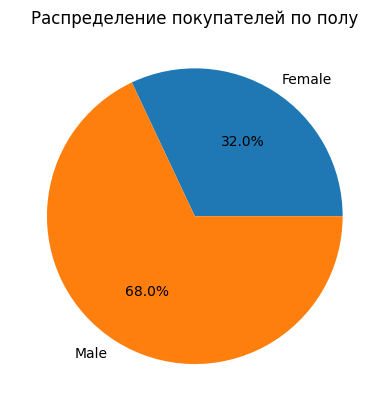

In [54]:
gender_num = df.groupby('Gender').size()

plt.pie(gender_num, labels=gender_num.index, autopct='%1.1f%%')
plt.title('Распределение покупателей по полу')
plt.show()

**Определим какой пол(и отдельно возраст) покупает больше всего**

In [20]:
gender_num = df.groupby(['Gender', 'Age']).size().reset_index(name='Purchase')
max_purchase = gender_num.loc[gender_num['Purchase'].idxmax()]
print('Gender purchase max:', max_purchase['Gender'])
print('Age purchase max:', max_purchase['Age'])

Gender purchase max: Male
Age purchase max: 41


**Определим какой пол(и отдельно возраст) покупает чаще всего**

In [35]:
gen_age_freq = df.groupby(['Gender', 'Age']).size().reset_index(name='Freq')
max_freq = gen_age_freq['Freq'].max()
max_freq_rows = gen_age_freq[gen_age_freq['Freq'] == max_freq]
max_freq_rows

,Gender,Age,Freq
76,Male,41,67
89,Male,54,67


**Определим какой пол(и отдельно возраст) покупает самые дорогие товары**

In [56]:
max_purchase_value = df['Purchase Amount (USD)'].max()
max_purchase_items = df[df['Purchase Amount (USD)'] == max_purchase_value]
age_gen_max_purchase = max_purchase_items.groupby(['Gender', 'Age']).size().reset_index(name='Amount')
age_gen_max_purchase

,Gender,Age,Amount
0,Female,18,1
1,Female,22,1
2,Female,28,1
3,Female,30,1
4,Female,32,1
5,Female,40,1
6,Female,45,1
7,Female,55,1
8,Female,56,1
9,Female,62,1


**Определим какой пол(и отдельно возраст) покупает самые дорогие товары чаще всего**

In [63]:
max_amount = age_gen_max_purchase['Amount'].max()
max_amount_gen_age = age_gen_max_purchase[age_gen_max_purchase['Amount'] == max_amount]
max_amount_gen_age

,Gender,Age,Amount
12,Male,20,3


**Определим есть ли зависимость между цветом одежды и сезоном**

In [74]:
pt_col_seas = pd.crosstab(df['Color'], df['Season'])

chi2, p, _, _ = stats.chi2_contingency(pt_col_seas)

print('p-value = ', p)
alpha = 0.05
if p < alpha:
    print("Связь между цветом одежды и сезоном  есть")
else:
    print("Связи нет")

p-value =  0.718551112120402
Связи нет


**Посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику**

In [76]:
data_cust_season = df.groupby(['Customer ID', 'Season'])['Customer ID'].nunique().reset_index(name='MAU')
data_cust_season

,Customer ID,Season,MAU
0,1,Winter,1
1,2,Winter,1
2,3,Spring,1
3,4,Spring,1
4,5,Spring,1
...,...,...,...
3895,3896,Summer,1
3896,3897,Spring,1
3897,3898,Spring,1
3898,3899,Summer,1


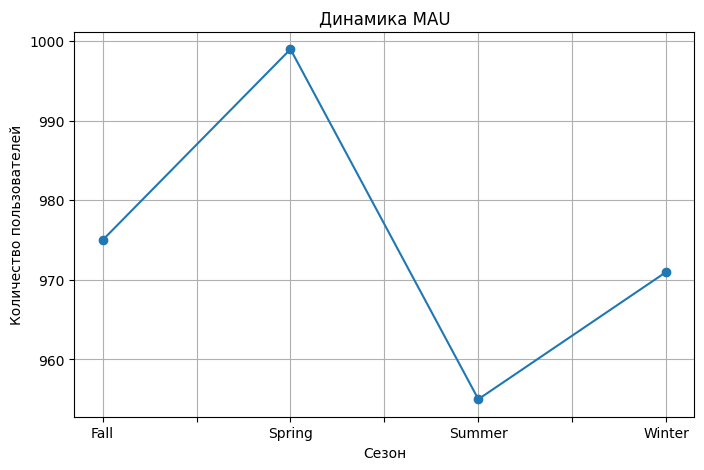

In [83]:
dinamic_mau = data_cust_season.groupby('Season')['MAU'].sum()

plt.figure(figsize=(8, 5))
dinamic_mau.plot(kind='line', marker='o')
plt.title('Динамика MAU')
plt.xlabel('Сезон')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

**Найдем самую популярную букву в названии одежды**

In [11]:
letter_counts = Counter()

for word in df['Item Purchased']:
    for letter in word:
        if letter.isalpha():
            letter_counts[letter.lower()] += 1

most_common_letter = letter_counts.most_common(1)[0][0]
most_common_letter

's'

# **Задания 3 и 4 уже делались в прошлых ДЗ**

<h1>Задание 3</h1> 

У нас есть данные о потреблении алкоголя о потреблнеии Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Давайте представим эти данные в виде df, где же люди пьют больше вина, пива и других спиртных напитков.

In [105]:
data_drinks = pd.read_csv('drinks.csv')
data_drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


Создадим функцию, которая будет выводить страну, в которой употребляют данный тип алгкоголя больше всего

In [128]:
def find_max_alco_country(serving_name):
    serv_max_value = data_drinks[serving_name].max()
    serv_max = data_drinks[data_drinks[serving_name] == serv_max_value]['country']
    print('max ' + serving_name)
    print('Country - ' + serv_max, '\n')

In [129]:
for spirit in data_drinks.columns[1:]:
    find_max_alco_country(spirit)

max beer_servings
117    Country - Namibia
Name: country, dtype: object 

max spirit_servings
68    Country - Grenada
Name: country, dtype: object 

max wine_servings
61    Country - France
Name: country, dtype: object 

max total_litres_of_pure_alcohol
15    Country - Belarus
Name: country, dtype: object 



<h1>Задание 4</h1> 

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде df и определим:

- число проклятий, летальных исходов и их отношение по фильмам 

- частота употребления конкретных прокрятий 

- распределение времени между проклятиями 

In [163]:
data_tr = pd.read_csv('tarantino.csv')
data_tr

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


Число проклятий, летальных исходов и их отношение по фильмам 

In [145]:
print('Total words in all movies ', data_tr[data_tr['type'] == 'word']['type'].count())
print('Total unique words in all movies ', data_tr[data_tr['type'] == 'word']['word'].nunique())
print('Total depths in all movies ', data_tr[data_tr['type'] == 'death']['type'].count())

Total words in all movies  1704
Total unique words in all movies  60
Total depths in all movies  190


In [156]:
words_movie_table = pd.pivot_table(data_tr, index='movie', values=['word', 'type'], aggfunc='count', dropna=True)
words_movie_table['depths'] = words_movie_table['type'] - words_movie_table['word']
words_movie_table = words_movie_table.drop('type', axis=1)
words_movie_table

,word,depths
movie,,
Django Unchained,262,47
Inglorious Basterds,58,48
Jackie Brown,368,4
Kill Bill: Vol. 1,57,63
Kill Bill: Vol. 2,69,11
Pulp Fiction,469,7
Reservoir Dogs,421,10


In [160]:
freq_words = data_tr.groupby('word', dropna=True).count()
freq_words = freq_words.drop(['minutes_in', 'type'], axis=1)
freq_words = freq_words.sort_values(by='movie', ascending=False)
freq_words

,movie
word,
fucking,407
shit,221
fuck,213
n-word,179
ass,140
goddamn,113
motherfucker,70
bitch,64
hell,45


Частота употребления конкретных проклятий 

In [161]:
freq_words = data_tr.groupby('word', dropna=True).count()
freq_words = freq_words.drop(['movie', 'type'], axis=1)
freq_words = freq_words.sort_values(by='minutes_in', ascending=False)
freq_words

,minutes_in
word,
fucking,407
shit,221
fuck,213
n-word,179
ass,140
goddamn,113
motherfucker,70
bitch,64
hell,45


Распределение времени между проклятиями 

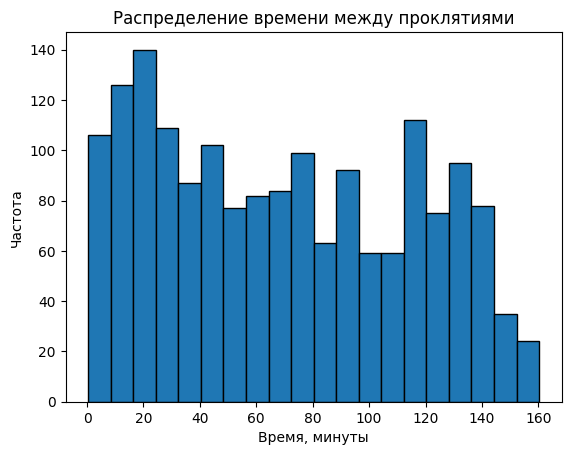

In [167]:
find_non_nan = data_tr[(data_tr['type'] == 'word') & ~data_tr['minutes_in'].isna()]

plt.hist(find_non_nan['minutes_in'], bins=20, edgecolor='k')
plt.title("Распределение времени между проклятиями")
plt.xlabel("Время, минуты")
plt.ylabel("Частота")
plt.show()